#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
## Reading the image plaksha_Faculty.jpg

img_color = cv2.imread('Plaksha_Faculty.jpg')
## Convert the image to grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(img_gray, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "faculty" ## The text you want to write
font = cv2.FONT_HERSHEY_COMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img_color, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img_color,text,(x,y-10),font, font_scale, font_color, font_thickness)    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total Number of Faces Identified:{len(faces_rect)} ",img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

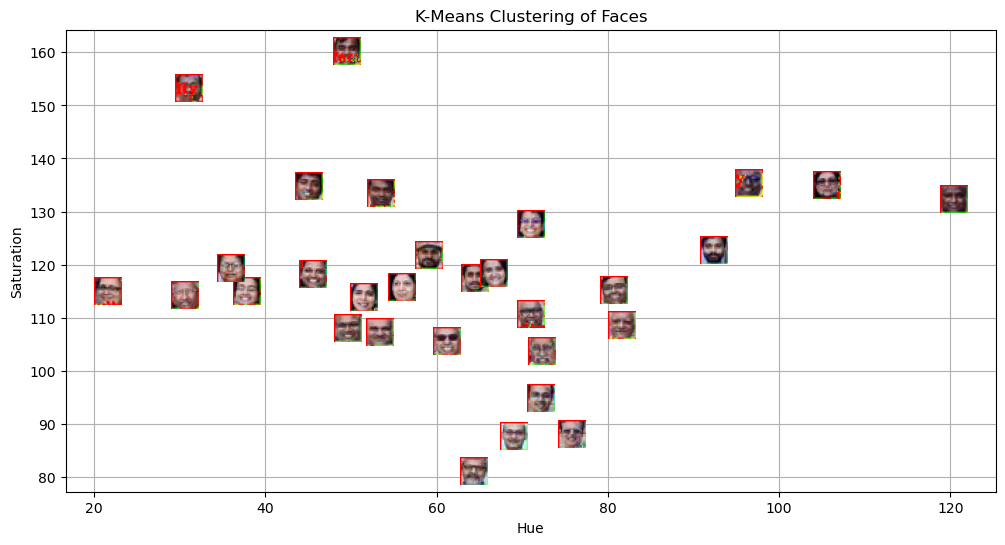

In [4]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
ax.set_xlabel("Hue")
## Put y label
ax.set_ylabel("Saturation")
## Put title
ax.set_title("K-Means Clustering of Faces")
## Put grid
ax.grid(True)
## show the plot
plt.show()

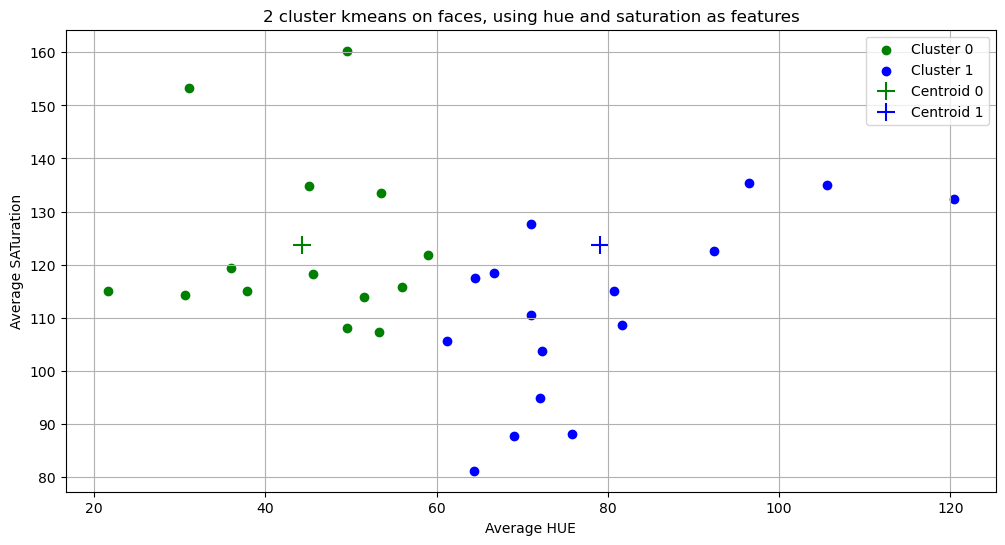

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0],cluster_0_points[:, 1],color='green',label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0],cluster_1_points[:, 1],color='blue',label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1],color='green',marker='+',s=150,label='Centroid 0')
plt.scatter(centroid_1[0], centroid_0[1],color='blue',marker='+',s=150,label='Centroid 1')

## Put x label
plt.xlabel('Average HUE')
## Put y label
plt.ylabel("Average SATuration")
## Put title
plt.title("2 cluster kmeans on faces, using hue and saturation as features")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()


In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(template_gray,scaleFactor=1.05,minNeighbors=4,minSize=(25, 25))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("thiru mp", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

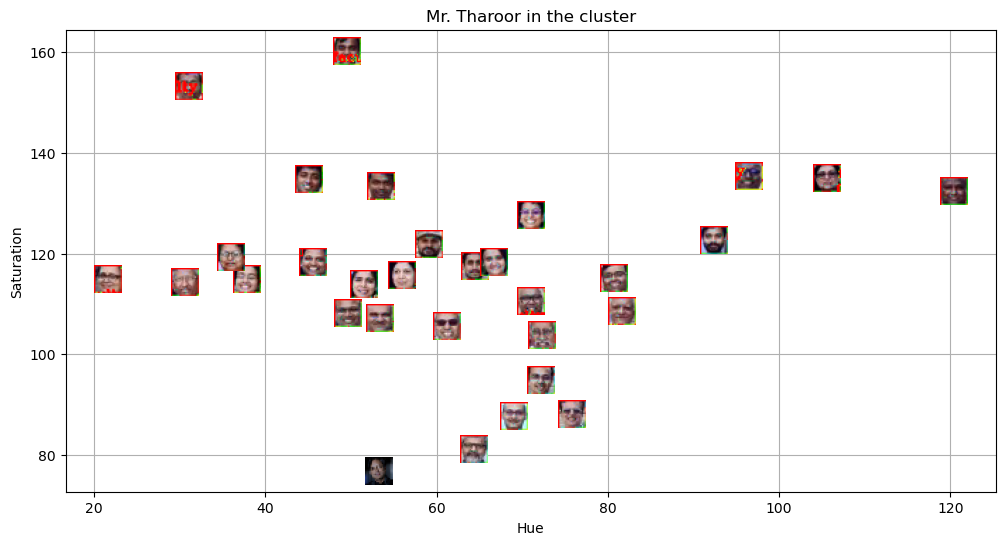

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
for (x, y, w, h) in template_faces:
    face = template_hsv[y:y+h, x:x+w]
    template_hue = np.mean(face[:, :, 0])
    template_saturation = np.mean(face[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

ax.plot(template_hue, template_saturation, 'o', markersize=5, color=color)
## Put x label
ax.set_xlabel('Hue')
## Put y label
ax.set_ylabel('Saturation')
## Put title
ax.set_title('Mr. Tharoor in the cluster')
## Add grid
ax.grid()
## show plot
plt.show()

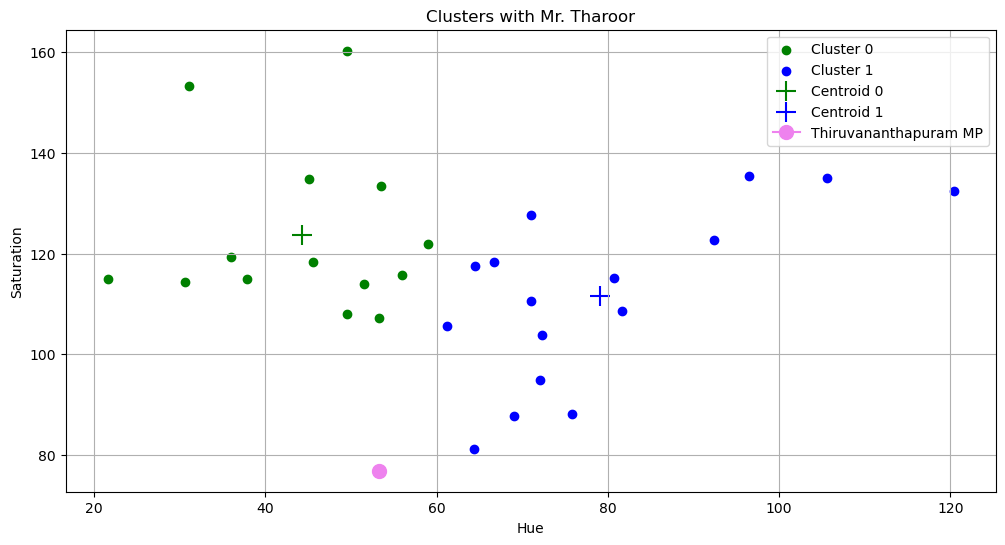

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0],cluster_0_points[:, 1],color='green',label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0],cluster_1_points[:, 1],color='blue',label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1],color='green',marker='+',s=200,label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1],color='blue',marker='+',s=200,label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', color= 'violet',markersize= 10, label='Thiruvananthapuram MP' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters with Mr. Tharoor")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Euclidean distance, Manhattan distance, Minkowski distance, Cosine distance, Hamming distance, Mahalanobis distance, Chebyshev distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
Text classification, disease prediction, recommendation systems etc.

#### 3. Explain various distance metrics. 
**Euclidean Distance**: The straight-line distance between two points in Euclidean space. Formula: √Σ(xi-yi)². Commonly used in KNN and K-means clustering. It's the most intuitive distance metric and works well when features are continuous and on similar scales.

**Manhattan Distance**: The sum of absolute differences between coordinates. Formula: Σ|xi-yi|. Also called L1 norm or taxicab distance. Useful when movement is restricted to grid-like paths (like city blocks) or when outliers should have less influence.

**Minkowski Distance**: A generalization of both Euclidean and Manhattan distances. Formula: (Σ|xi-yi|^p)^(1/p). When p=2, it becomes Euclidean distance; when p=1, it becomes Manhattan distance. Allows flexibility in choosing different distance behaviors.


**Chebyshev Distance**: The maximum absolute difference between coordinates. Formula: max|xi-yi|. Also called L∞ norm. Useful when we care only about the dimension with the maximum difference.


#### 4. What is the role of cross validation in model performance? 

Cross-validation is a resampling technique used to evaluate machine learning models on a limited data sample. Its main roles include:

1. **Preventing Overfitting**: By testing the model on unseen data portions (validation sets), it helps detect if the model is memorizing training data rather than learning generalizable patterns. This is crucial for understanding how well the model will perform on new, unseen data.

2. **Better Model Evaluation**: Provides a more reliable and robust estimate of model performance compared to a single train-test split. Since it uses multiple training and validation sets, the evaluation is less dependent on the particular way the data was split.

3. **Hyperparameter Tuning**: Helps in selecting optimal hyperparameters (like K in KNN, learning rate, regularization parameters, etc.) by systematically comparing model performance across different parameter values using the same evaluation methodology.

#### 5. Explain variance and bias in terms of KNN? 

In KNN, the bias-variance tradeoff is controlled by the value of K:

**Bias**:
- **Low K (K=1)**: Low bias - model closely follows training data with flexible decision boundaries
- **High K**: High bias - averaging over many neighbors creates smoother boundaries that may miss local patterns

**Variance**:
- **Low K (K=1)**: High variance - predictions are very sensitive to individual training points and noise
- **High K**: Low variance - averaging over neighbors reduces sensitivity to fluctuations

**The Tradeoff**:
- As K increases: Bias ↑, Variance ↓ (model becomes simpler and more stable)
- As K decreases: Bias ↓, Variance ↑ (model becomes more complex but less stable)
- Too small K → Overfitting (high variance, captures noise)
- Too large K → Underfitting (high bias, misses patterns)
- Optimal K balances both and is found using cross-validation